In [23]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot
import geopandas as gpd
from PIL import Image
from shapely.geometry import Point, Polygon
pd.__version__

'1.3.4'

['Zone30' 'Zone50' 'andere' 'Begegnungszone' 'Zone40' 'Fussgaengerzone'
 'Zone60']
['Trottoir' 'Fussweg_Park' 'Trottoirallee' 'Strasse' 'Platz' 'OeV_Station'
 'Unterfuehrung' 'andere' 'Ueberfuehrung']
                        Geo Point  \
0       47.5608316716,7.566041921   
1     47.5607438775,7.56456894559   
2     47.5622738606,7.56488352057   
3     47.5595876078,7.56702692907   
4     47.5580427147,7.56701928893   
...                           ...   
4471  47.5694110378,7.59690417868   
4472   47.560873921,7.60485760076   
4473  47.5619122639,7.59938803704   
4474   47.5624587563,7.5927626175   
4475   47.561187485,7.59057773566   

                                              Geo Shape  OBJID    ID  \
0     {"type": "LineString", "coordinates": [[7.5654...      1     1   
1     {"type": "LineString", "coordinates": [[7.5644...      3     3   
2     {"type": "LineString", "coordinates": [[7.5644...     10    10   
3     {"type": "LineString", "coordinates": [[7.5668...     17    

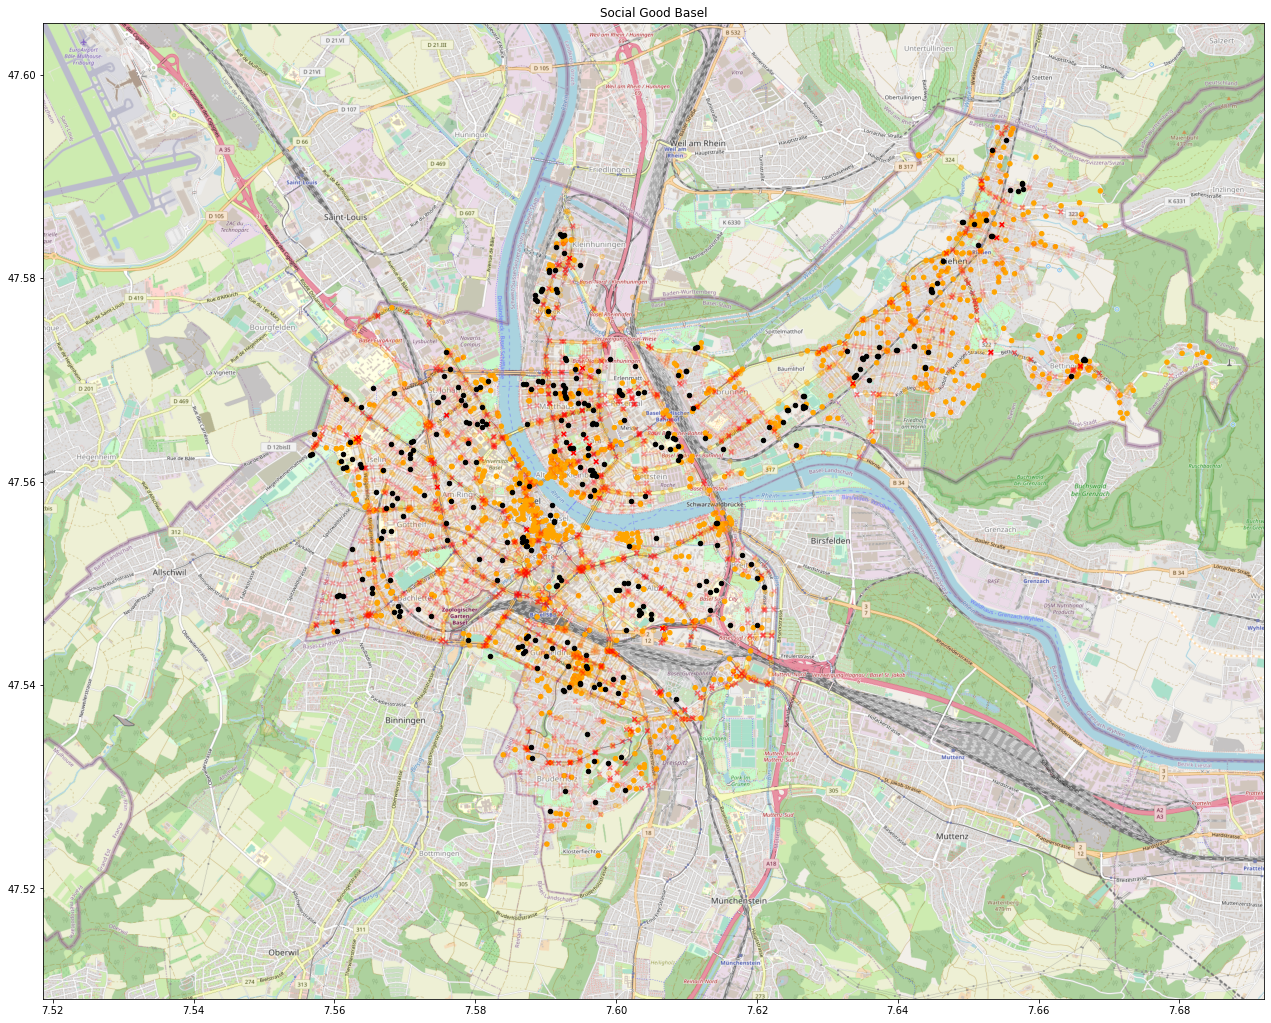

In [31]:
ssbs = pd.read_csv('datasets/Schulstandorte_Basel.csv', sep=';')
ssbs[['lat', 'long']] = pd.DataFrame(ssbs['Geo Point'].str.split(',').fillna('[]').tolist(), columns = ['lat', 'long'])
ssbs['long'] = [float (x) for x in ssbs['long']]
ssbs['lat'] = [float (x) for x in ssbs['lat']]

ssrb = pd.read_csv('datasets/Schulstandorte_RB.csv', sep=';')
ssrb[['lat', 'long']] = pd.DataFrame(ssrb['Geo Point'].str.split(',').fillna('[]').tolist(), columns = ['lat', 'long'])
ssrb['long'] = [float (x) for x in ssrb['long']]
ssrb['lat'] = [float (x) for x in ssrb['lat']]

ssfw = pd.read_csv('datasets/SchulwegSicherheit_FW.csv', sep=';')
ssfw[['lat', 'long']] = pd.DataFrame(ssfw['Geo Point'].str.split(',').fillna('[]').tolist(), columns = ['lat', 'long'])
ssfw['long'] = [float (x) for x in ssfw['long']]
ssfw['lat'] = [float (x) for x in ssfw['lat']]
print(ssfw['Strassenkategorie'].unique())
print(ssfw['Fusswegtyp'].unique())
ssfw['danger'] = np.where(ssfw['Fusswegtyp'] == 'Fussweg_Park', 0.0, 
             np.where((ssfw['Fusswegtyp'] == 'Trottoir') & (ssfw['Strassenkategorie'] == 'Zone30'), 0.1,
             np.where((ssfw['Fusswegtyp'] == 'Trottoir') & (ssfw['Strassenkategorie'] == 'Zone40'), 0.2,
             np.where((ssfw['Fusswegtyp'] == 'Trottoir') & (ssfw['Strassenkategorie'] == 'Zone50'), 0.3,
             np.where((ssfw['Fusswegtyp'] == 'Trottoir') & (ssfw['Strassenkategorie'] == 'Zone60'), 0.4,
             np.where((ssfw['Fusswegtyp'] == 'Fussweg_Park'), 0.1,
             np.where((ssfw['Fusswegtyp'] == 'Trottoirallee'), 0.2,
             1.0)))))))
print(ssfw)
                                    
sssq = pd.read_csv('datasets/SchulwegSicherheit_SQ.csv', sep=';')
sssq[['lat', 'long']] = pd.DataFrame(sssq['Geo Point'].str.split(',').fillna('[]').tolist(), columns = ['lat', 'long'])
sssq['long'] = [float (x) for x in sssq['long']]
sssq['lat'] = [float (x) for x in sssq['lat']]
sssq = sssq.replace(to_replace=['geeignet', 'erhöhte Anforderung', 'anspruchsvoll', 'nicht empfohlen'], value=[0.1, 0.3, 0.5, 1])

vrs = pd.read_csv('datasets/VerkehrsreicheStrassen.csv', sep=';')
kja = pd.read_csv('datasets/KinderJugendAngebote.csv', sep=';')

"""
maxlat = -1.0
minlat = 10000000.0
maxlong = 0.0
minlong = 91.0
for s in [ssbs, ssrb, ssfw, sssq, vrs, kja]:
    for x in s['Geo Point']:
        lat = float (x.split(',')[0])
        long = float (x.split(',')[1])
        
        if lat > maxlat:
            maxlat = lat
        elif lat < minlat:
            minlat = lat
            
        if long > maxlong:
            maxlong = long
        elif long < minlong:
            minlong = long
"""
            
maxlat = 47.6050850914
minlat = 47.509140404
maxlong = 7.69200194605
minlong = 7.51860244653

BBox = ((minlong, maxlong, minlat, maxlat))
img = Image.open('resources/map.png')
fig, ax = plt.pyplot.subplots(figsize = (2188 / 100,1795 / 100))

ax.scatter(ssfw.long, ssfw.lat, zorder=1, c='orange', s=20, alpha=ssfw['danger'])
ax.scatter(sssq.long, sssq.lat, zorder=1, c='red', s=20, alpha=sssq['Bewertung'], marker='x')

ax.scatter(ssbs.long, ssbs.lat, zorder=1, c='black', s=20)
ax.scatter(ssrb.long, ssrb.lat, zorder=1, c='black', s=20)

ax.set_title('Social Good Basel')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(img, zorder=0, extent=BBox, aspect='auto')



In [121]:
crs = {'init' : 'epsg:4326'} # define coordinate reference system
#geometry = [Point([float (x) for x in list(xy.split(','))]) for xy in ssbs['Geo Point']]
#geodata = gpd.GeoDataFrame(ssbs, crs=crs, geometry=geometry)
#geodata.plot()
